# IMPORT LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.cluster import DBSCAN, KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# LOAD DATASET

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load the dataset
dataset_path = '/content/drive/MyDrive/machine_learning/crime_new.csv'
data = pd.read_csv(dataset_path)


# READ DATASET

In [ ]:
data.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


In [ ]:
data.head(10)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
5,Other Theft,2003,3,26,20.0,45.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
6,Break and Enter Residential/Other,2003,3,10,12.0,0.0,63XX WILTSHIRE ST,Kerrisdale,489325.58,5452817.95,49.228051,-123.146610
7,Mischief,2003,6,28,4.0,13.0,40XX W 19TH AVE,Dunbar-Southlands,485903.09,5455883.77,49.255559,-123.193725
8,Other Theft,2003,2,16,9.0,2.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
9,Break and Enter Residential/Other,2003,7,9,18.0,15.0,18XX E 3RD AVE,Grandview-Woodland,495078.19,5457221.38,49.267734,-123.067654


In [ ]:
data.describe()

,YEAR,MONTH,DAY,HOUR,MINUTE,X,Y,Latitude,Longitude
count,1546.0,1546.000000,1546.000000,1425.000000,1425.000000,1546.000000,1.546000e+03,1546.000000,1546.000000
mean,2003.0,6.556274,15.014230,13.503860,20.312982,453384.918396,5.029551e+06,45.406710,-113.476056
std,0.0,3.439312,8.771744,6.533526,18.637441,132185.726370,1.466073e+06,13.235682,33.077316
min,2003.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-123.209062
25%,2003.0,4.000000,7.000000,9.000000,0.000000,489811.560000,5.454199e+06,49.240488,-123.133478
50%,2003.0,7.000000,15.000000,15.000000,20.000000,490975.800000,5.457230e+06,49.267813,-123.119769
75%,2003.0,10.000000,22.000000,19.000000,35.000000,494073.410000,5.458433e+06,49.278580,-123.068164
max,2003.0,12.000000,31.000000,23.000000,59.000000,498275.000000,5.462043e+06,49.311037,0.000000


In [ ]:
data.info

<bound method DataFrame.info of                                                    TYPE  YEAR  MONTH  DAY  \
0                                           Other Theft  2003      5   12   
1                                           Other Theft  2003      5    7   
2                                           Other Theft  2003      4   23   
3                                           Other Theft  2003      4   20   
4                                           Other Theft  2003      4   12   
...                                                 ...   ...    ...  ...   
1541  Vehicle Collision or Pedestrian Struck (with I...  2003      3   22   
1542  Vehicle Collision or Pedestrian Struck (with I...  2003      9   20   
1543                  Break and Enter Residential/Other  2003      7    4   
1544                           Offence Against a Person  2003      2    3   
1545                  Break and Enter Residential/Other  2003     12   14   

      HOUR  MINUTE               HUNDRED_BLOCK              NEIGHBOURHOOD  \
0     16.0    15.0            9XX TERMINAL AVE                 Strathcona   
1     15.0    20.0            9XX TERMINAL AVE                 Strathcona   
2     16.0    40.0            9XX TERMINAL AVE                 Strathcona   
3     11.0    15.0            9XX TERMINAL AVE                 Strathcona   
4     17.0    45.0            9XX TERMINAL AVE                 Strathcona   
...    ...     ...                         ...                        ...   
1541   4.0    35.0   COLUMBIA ST / E PENDER ST  Central Business District   
1542   8.0    14.0  COLUMBIA ST / E CORDOVA ST  Central Business District   
1543  13.0    30.0              19XX ADANAC ST         Grandview-Woodland   
1544   NaN     NaN   OFFSET TO PROTECT PRIVACY                        NaN   
1545  12.0     0.0             67XX SELKIRK ST                   Oakridge   

              X           Y   Latitude   Longitude  
0     493906.50  5457452.47  49.269802 -123.083763  
1     493906.50  5457452.47  49.269802 -123.083763  
2     493906.50  5457452.47  49.269802 -123.083763  
3     493906.50  5457452.47  49.269802 -123.083763  
4     493906.50  5457452.47  49.269802 -123.083763  
...         ...         ...        ...         ...  
1541  492561.00  5458637.00  49.280442 -123.102281  
1542  492565.00  5458848.00  49.282340 -123.102230  
1543  495331.82  5458303.24  49.277467 -123.064180  
1544       0.00        0.00   0.000000    0.000000  
1545  490292.33  5452422.73  49.224512 -123.133323  

[1546 rows x 12 columns]>

In [ ]:
data.shape

(1546, 12)

In [ ]:
data.isnull().sum()

TYPE               0
YEAR               0
MONTH              0
DAY                0
HOUR             121
MINUTE           121
HUNDRED_BLOCK      0
NEIGHBOURHOOD    121
X                  0
Y                  0
Latitude           0
Longitude          0
dtype: int64

# drop missing value columns

In [ ]:
columns_to_drop = ["HOUR", "MINUTE", "NEIGHBOURHOOD"]
data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
data.isnull().sum()

TYPE             0
YEAR             0
MONTH            0
DAY              0
HUNDRED_BLOCK    0
X                0
Y                0
Latitude         0
Longitude        0
dtype: int64

In [ ]:
data.shape

(1546, 9)

In [ ]:
data.head()

,TYPE,YEAR,MONTH,DAY,HUNDRED_BLOCK,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,9XX TERMINAL AVE,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,9XX TERMINAL AVE,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,9XX TERMINAL AVE,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,9XX TERMINAL AVE,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,9XX TERMINAL AVE,493906.5,5457452.47,49.269802,-123.083763


# Label encoding

In [ ]:
# Encode categorical features
label_encoder = LabelEncoder()
data["HUNDRED_BLOCK"] = label_encoder.fit_transform(data["HUNDRED_BLOCK"])

In [ ]:
# Extract features (X) and target variable (y)
X = data.drop(columns=["TYPE"])
y = data["TYPE"]

In [ ]:
print("Features (X):")
print(X.head())
print("\nTarget Variable (y):")
print(y.head())

Features (X):
   YEAR  MONTH  DAY  HUNDRED_BLOCK         X           Y   Latitude  \
0  2003      5   12            307  493906.5  5457452.47  49.269802   
1  2003      5    7            307  493906.5  5457452.47  49.269802   
2  2003      4   23            307  493906.5  5457452.47  49.269802   
3  2003      4   20            307  493906.5  5457452.47  49.269802   
4  2003      4   12            307  493906.5  5457452.47  49.269802   

    Longitude  
0 -123.083763  
1 -123.083763  
2 -123.083763  
3 -123.083763  
4 -123.083763  

Target Variable (y):
0    Other Theft
1    Other Theft
2    Other Theft
3    Other Theft
4    Other Theft
Name: TYPE, dtype: object


# Normalization

In [ ]:
# Normalize features using Min-Max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)



In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# classification algorithm
# 1.logistic regression

In [ ]:
# Train a logistic regression model with increased max_iter
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predict on the test set
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Logistic Regression Accuracy: {accuracy:.2f}")


Logistic Regression Accuracy: 0.69


# 2.Support Vector Machine

In [ ]:

# Initialize the Support Vector Machine (SVM) Classifier
svm_classifier = SVC()

# Train the SVM model
svm_classifier.fit(X_train, y_train)



SVC()

In [ ]:
# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate SVM accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Classifier Accuracy: {accuracy_svm:.2f}")


SVM Classifier Accuracy: 0.70


# CLUSTERING

# 3.DBCAN(Density-Based Spatial Clustering )

In [ ]:
# Perform density-based clustering using DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)


In [ ]:
# Silhouette Score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, dbscan_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")



Silhouette Score: 0.68


# 4.K-Mean

In [ ]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=5)
kmeans_labels = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Evaluate using Silhouette Score
silhouette_avg = silhouette_score(X_scaled, kmeans_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")


Silhouette Score: 0.32


#5.Mean Shift

In [ ]:
from sklearn.cluster import  MeanShift
# Perform Mean Shift clustering
mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(X_scaled)




In [ ]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_scaled, mean_shift_labels)
print(f"Mean Shift Clustering Silhouette Score: {silhouette_avg:.2f}")

Mean Shift Clustering Silhouette Score: 0.68


# 6.Agglomerative Clustering

In [ ]:
clustering = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
hierarchical_labels = clustering.fit_predict(X_scaled)



In [ ]:
# Calculate the Silhouette score
silhouette_avg = silhouette_score(X_scaled, hierarchical_labels)

# Print the result
print(f"Silhouette score: {silhouette_avg:.2f}")

Silhouette score: 0.68


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Mean Shift Clustering Silhouette Score: 0.55
K-Means Clustering Silhouette Score: 0.80
DBSCAN Silhouette Score: 0.74
Hierarchical Clustering Silhouette Score: 0.80


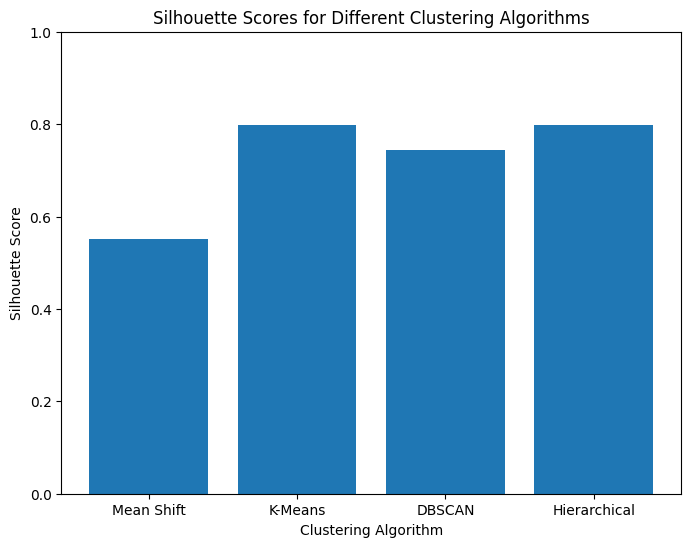

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift, KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply clustering algorithms
mean_shift = MeanShift()
kmeans = KMeans(n_clusters=4, random_state=42)
dbscan = DBSCAN(eps=0.5, min_samples=5)
hierarchical = AgglomerativeClustering(n_clusters=4)

mean_shift_labels = mean_shift.fit_predict(X_scaled)
kmeans_labels = kmeans.fit_predict(X_scaled)
dbscan_labels = dbscan.fit_predict(X_scaled)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Calculate Silhouette Score
silhouette_avg_mean_shift = silhouette_score(X_scaled, mean_shift_labels)
silhouette_avg_kmeans = silhouette_score(X_scaled, kmeans_labels)
silhouette_avg_dbscan = silhouette_score(X_scaled, dbscan_labels)
silhouette_avg_hierarchical = silhouette_score(X_scaled, hierarchical_labels)

# Print Silhouette Scores
print(f"Mean Shift Clustering Silhouette Score: {silhouette_avg_mean_shift:.2f}")
print(f"K-Means Clustering Silhouette Score: {silhouette_avg_kmeans:.2f}")
print(f"DBSCAN Silhouette Score: {silhouette_avg_dbscan:.2f}")
print(f"Hierarchical Clustering Silhouette Score: {silhouette_avg_hierarchical:.2f}")

# Create a bar plot for Silhouette Scores
labels = ["Mean Shift", "K-Means", "DBSCAN", "Hierarchical"]
scores = [silhouette_avg_mean_shift, silhouette_avg_kmeans, silhouette_avg_dbscan, silhouette_avg_hierarchical]

plt.figure(figsize=(8, 6))
plt.bar(labels, scores)
plt.xlabel("Clustering Algorithm")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different Clustering Algorithms")
plt.ylim(0, 1.0)
plt.show()


# Ensemble Classifiers


### **7.Random Forest Classifier**

In [ ]:

X = data.drop(columns=["TYPE"])
y = data["TYPE"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Accuracy: 0.97
Classification Report:
                                                       precision    recall  f1-score   support

                          Break and Enter Commercial       0.96      1.00      0.98        22
                   Break and Enter Residential/Other       0.96      0.98      0.97        55
                                            Mischief       0.96      0.79      0.86        28
                            Offence Against a Person       1.00      1.00      1.00        34
                                         Other Theft       0.93      1.00      0.96        13
                                  Theft from Vehicle       0.92      0.96      0.94        51
Vehicle Collision or Pedestrian Struck (with Injury)       1.00      1.00      1.00       107

                                            accuracy                           0.97       310
                                           macro avg       0.96      0.96      0.96       310
                   

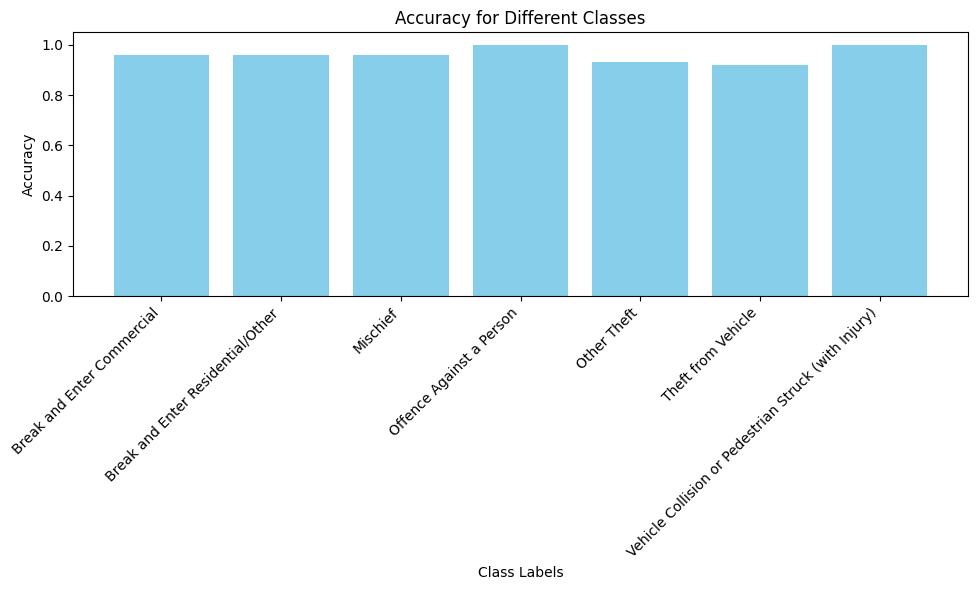

In [ ]:

accuracy_values = [0.96, 0.96, 0.96, 1.00, 0.93, 0.92, 1.00]

# Labels for each class
class_labels = [
    "Break and Enter Commercial",
    "Break and Enter Residential/Other",
    "Mischief",
    "Offence Against a Person",
    "Other Theft",
    "Theft from Vehicle",
    "Vehicle Collision or Pedestrian Struck (with Injury)"
]

# Create a bar plot for accuracy
plt.figure(figsize=(10, 6))
plt.bar(class_labels, accuracy_values, color='skyblue')
plt.xlabel("Class Labels")
plt.ylabel("Accuracy")
plt.title("Accuracy for Different Classes")
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


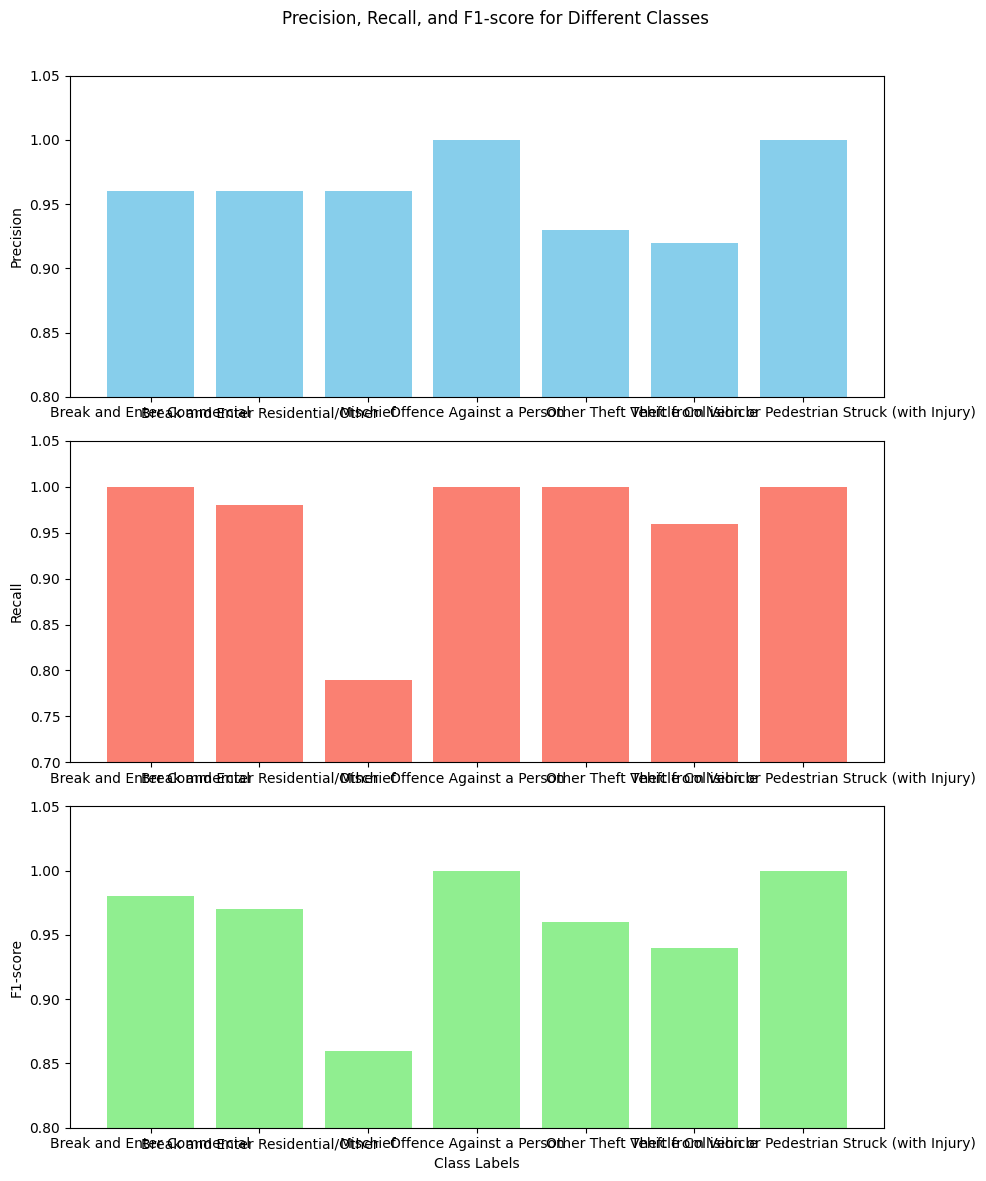

In [ ]:

# Precision, recall, and F1-score values from your classification report
precision_values = [0.96, 0.96, 0.96, 1.00, 0.93, 0.92, 1.00]
recall_values = [1.00, 0.98, 0.79, 1.00, 1.00, 0.96, 1.00]
f1_score_values = [0.98, 0.97, 0.86, 1.00, 0.96, 0.94, 1.00]

# Labels for each class
class_labels = [
    "Break and Enter Commercial",
    "Break and Enter Residential/Other",
    "Mischief",
    "Offence Against a Person",
    "Other Theft",
    "Theft from Vehicle",
    "Vehicle Collision or Pedestrian Struck (with Injury)"
]

# Create subplots for precision, recall, and F1-score
fig, axs = plt.subplots(3, 1, figsize=(10, 12))
fig.suptitle("Precision, Recall, and F1-score for Different Classes")

# Plot precision
axs[0].bar(class_labels, precision_values, color='skyblue')
axs[0].set_ylabel("Precision")
axs[0].set_ylim(0.8, 1.05)

# Plot recall
axs[1].bar(class_labels, recall_values, color='salmon')
axs[1].set_ylabel("Recall")
axs[1].set_ylim(0.7, 1.05)

# Plot F1-score
axs[2].bar(class_labels, f1_score_values, color='lightgreen')
axs[2].set_xlabel("Class Labels")
axs[2].set_ylabel("F1-score")
axs[2].set_ylim(0.8, 1.05)

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Show the plot
plt.show()


### **8.Gradient Boosting**

In [ ]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate performance (e.g., accuracy and classification report)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

classification_report_str = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report_str)


Accuracy: 0.97
Classification Report:
                                                      precision    recall  f1-score   support

                          Break and Enter Commercial       0.92      1.00      0.96        22
                   Break and Enter Residential/Other       1.00      1.00      1.00        55
                                            Mischief       0.86      0.89      0.88        28
                            Offence Against a Person       1.00      1.00      1.00        34
                                         Other Theft       1.00      1.00      1.00        13
                                  Theft from Vehicle       0.94      0.88      0.91        51
Vehicle Collision or Pedestrian Struck (with Injury)       1.00      1.00      1.00       107

                                            accuracy                           0.97       310
                                           macro avg       0.96      0.97      0.96       310
                    

## **GRAPHS**

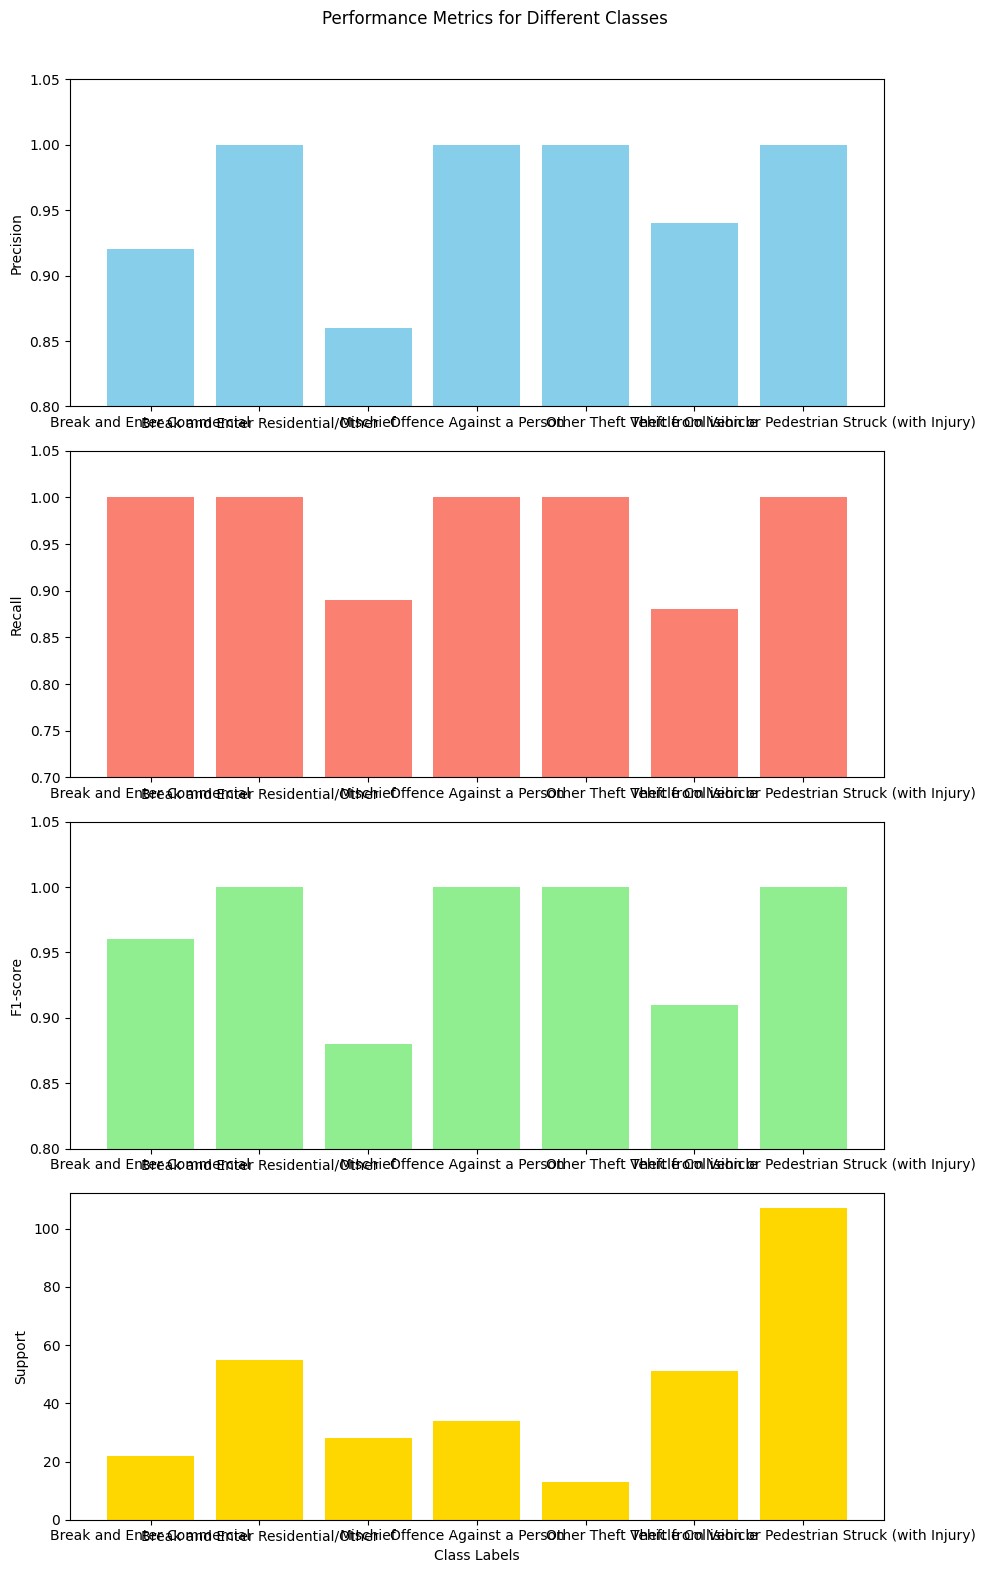

In [ ]:

# Precision, recall, F1-score, and support values from your classification report
precision_values = [0.92, 1.00, 0.86, 1.00, 1.00, 0.94, 1.00]
recall_values = [1.00, 1.00, 0.89, 1.00, 1.00, 0.88, 1.00]
f1_score_values = [0.96, 1.00, 0.88, 1.00, 1.00, 0.91, 1.00]
support_values = [22, 55, 28, 34, 13, 51, 107]

# Labels for each class
class_labels = [
    "Break and Enter Commercial",
    "Break and Enter Residential/Other",
    "Mischief",
    "Offence Against a Person",
    "Other Theft",
    "Theft from Vehicle",
    "Vehicle Collision or Pedestrian Struck (with Injury)"
]

# Create subplots for accuracy, recall, F1-score, and support
fig, axs = plt.subplots(4, 1, figsize=(10, 16))
fig.suptitle("Performance Metrics for Different Classes")

# Plot accuracy
axs[0].bar(class_labels, precision_values, color='skyblue')
axs[0].set_ylabel("Precision")
axs[0].set_ylim(0.8, 1.05)

# Plot recall
axs[1].bar(class_labels, recall_values, color='salmon')
axs[1].set_ylabel("Recall")
axs[1].set_ylim(0.7, 1.05)

# Plot F1-score
axs[2].bar(class_labels, f1_score_values, color='lightgreen')
axs[2].set_ylabel("F1-score")
axs[2].set_ylim(0.8, 1.05)

# Plot support
axs[3].bar(class_labels, support_values, color='gold')
axs[3].set_xlabel("Class Labels")
axs[3].set_ylabel("Support")

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Show the plot
plt.show()


## **Density Plot**

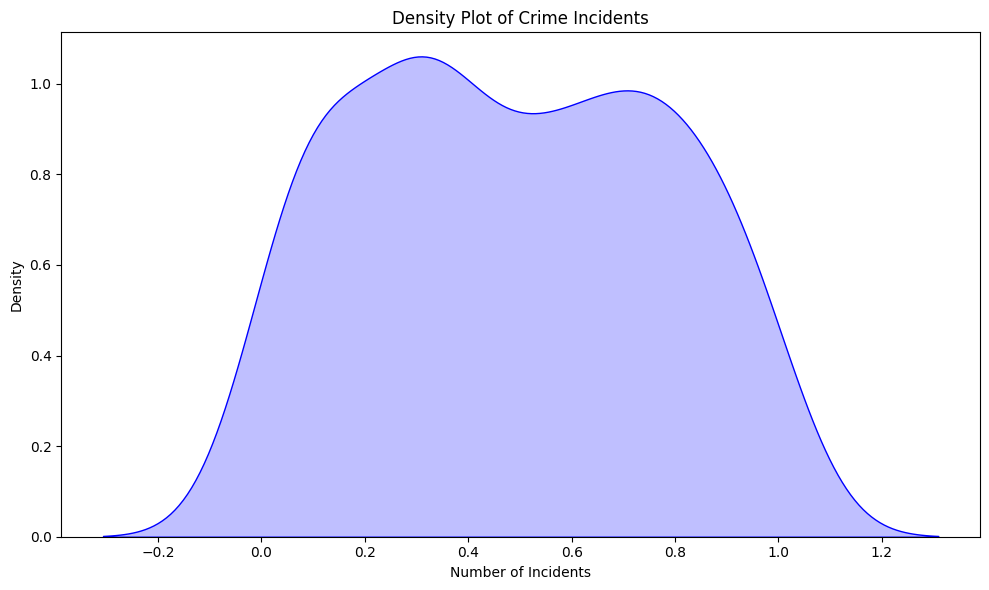

In [ ]:

dates = pd.date_range(start='2023-01-01', end='2023-06-30', freq='D')
values = np.random.rand(len(dates))

# Create a DataFrame from the generated data
data = pd.DataFrame({'Incidents': values}, index=dates)

# Plot the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Incidents'], color='blue', fill=True)
plt.xlabel('Number of Incidents')
plt.ylabel('Density')
plt.title('Density Plot of Crime Incidents')
plt.tight_layout()
plt.show()


### **Time Series Plot (Trend of Crime Incidents Over Time):**

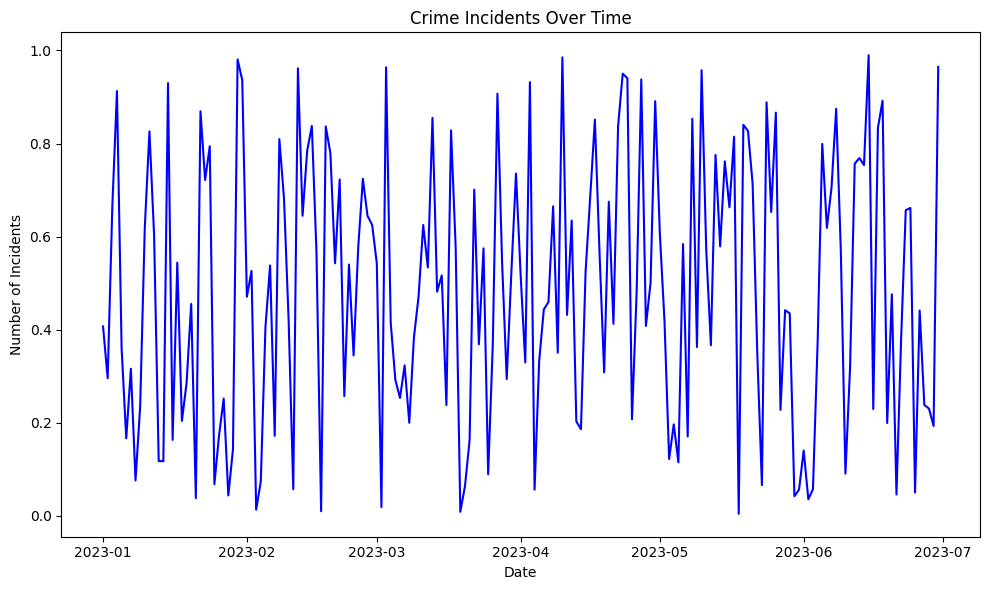

In [ ]:
# Generate random data (replace this with your actual crime dataset)
dates = pd.date_range(start='2023-01-01', end='2023-06-30', freq='D')
values = np.random.rand(len(dates))

# Create a DataFrame from the generated data
data = pd.DataFrame({'Incidents': values}, index=dates)

# Plot time series data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Incidents'], color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.title('Crime Incidents Over Time')
plt.tight_layout()
plt.show()


### **Distribution of Crime Types**

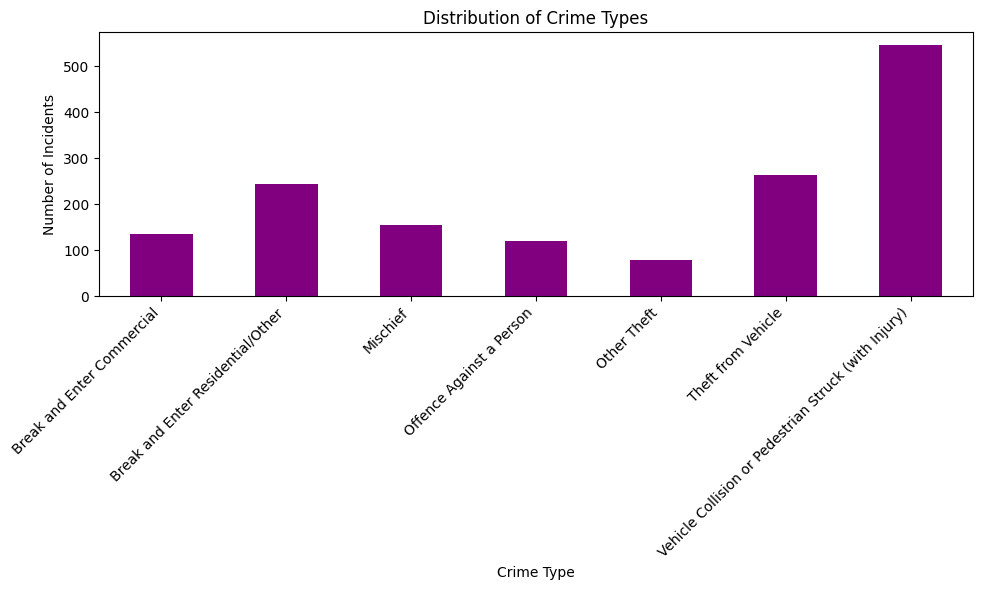

In [ ]:
crime_type_counts = data.groupby('TYPE').size()

# Create a bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
crime_type_counts.plot(kind='bar', color='purple')
plt.xlabel('Crime Type')
plt.ylabel('Number of Incidents')
plt.title('Distribution of Crime Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Combined ensemble learning

In [ ]:
# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Create a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)



In [ ]:
# Combine predictions using majority voting
def combine_predictions(y_pred_rf, y_pred_gb):
    combined_pred = []
    for rf, gb in zip(y_pred_rf, y_pred_gb):
        combined_pred.append(rf if rf == gb else gb)
    return combined_pred

# Combine predictions
y_combined_pred = combine_predictions(y_pred_rf, y_pred_gb)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_combined_pred)

# Print the accuracy
print(f"Combined model accuracy: {accuracy:.2f}")


Combined model accuracy: 0.97


### **INFERENCES**

# **1.Classification**

**Logistic regression** gives an accuracy of 69% **SVM** got an accuracy of 70%

# **2. Clustering**

### A silhouette score of 0.68 indicates that the clusters produced by **DBSCAN,mean shift,Hierarchical Clusters** have relatively good separation as compare to silhouette score of 0.30 that suggests moderate separation among the clusters produced by **K-means**.

### **3.Ensemble Classifiers**

##  **1.Random Forest Classifier**

### the model has high precision, recall, and F1-score across multiple classes, with an overall accuracy of 0.97. This suggests that the Random Forest Classifier model performs well on the given dataset.





## **2.Gradient Boosting**

### The model has high precision, recall, and F1-score across multiple classes, with an overall accuracy of 0.97. This suggests that the Gradient Boosting Classifier model performs well on the given dataset, similar to the Random Forest Classifier model mentioned earlier. Both models have similar accuracy and performance metrics across different classes.

# **GRAPHS**

**1.Performance Metrics Graphs**



Generated a set of subplots to visually compare the performance metrics of different classes in a classification report, providing insights into the model's performance across various categories.


**2.Density Plot**

A density plot to visualize the distribution of crime incidents over time, providing insights into the density or concentration of incidents across the specified time period.

**3.Time Series Plot (Trend of Crime Incidents Over Time):**




A time series plot to visualize the trend of crime incidents over the specified time period, providing insights into how the number of incidents varies over time.

**4.Distribution of Crime Types**

 A bar chart to visualize the distribution of crime types based on the count of incidents, providing insights into which crime types are most prevalent in the dataset.

**5.Hourly Crime Distribution**

A bar plot to visualize the distribution of crime incidents by hour of the day, providing insights into the variations in crime activity throughout the day.